# California Housing Price Prediction : 

### Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

### Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

### Domain: Finance and Housing

#### Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.




In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

%matplotlib inline

###### 1. Load the data :

Read the “housing.xslx” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.



In [162]:
# Load the data using read_excel method in pandas
# housing_dt = pd.pandas.read_excel(r'/Users/arvindatmuri/PythonProjects/California Housing Price Prediction/california_housing_dataset.xlsx')
housing_dt = pd.pandas.read_excel(r'/content/california_housing_dataset.xlsx')
housing_dt.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [135]:
# Dataset Description using shape method()
print("Rows:", housing_dt.shape[0])
print("Columns:", housing_dt.shape[1])

Rows: 20640
Columns: 10


## Dataset Description :

#### Dataset Size : 20640 rows x 10 columns

In [136]:
# Count and Column Data Type
housing_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


## Field	Description

longitude	(signed numeric - float) : Longitude value for the block in California, USA

latitude	(numeric - float) : Latitude value for the block in California, USA

housing_median_age	(numeric - int) : Median age of the house in the block

total_rooms	(numeric - int) : Count of the total number of rooms (excluding bedrooms) in all houses in the block

total_bedrooms	(numeric - float) : Count of the total number of bedrooms in all houses in the block

population	(numeric - int) : Count of the total number of population in the block

households	(numeric - int) : Count of the total number of households in the block

median_income	(numeric - float) : Median of the total household income of all the houses in the block

ocean_proximity	(numeric - categorical) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]

median_house_value	(numeric - int) : Median of the household prices of all the houses in the block
 

In [137]:
# Calculate all the Measures of Central Tendency
housing_dt.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### 2. Handle missing values :

Fill the missing values with the mean of the respective column.

In [138]:
housing_dt.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [139]:
# Calculate all the Measures of Central Tendency(Mean, Median and Mode) for Total Bedrooms
mean_total_bedrooms = housing_dt['total_bedrooms'].mean()
median_total_bedrooms = housing_dt['total_bedrooms'].median()
mode_total_bedrooms = housing_dt['total_bedrooms'].mode()

In [140]:
print("Mean:", mean_total_bedrooms)
print("Median: ", median_total_bedrooms)
# print("Mode:", mode_total_bedrooms)
print("Null Values: ", housing_dt['total_bedrooms'].isnull().sum())

Mean: 537.8705525375618
Median:  435.0
Null Values:  207


##### Let's stick to Mean in this case, to replace the NA/Null values as per the task

In [141]:
# Filling Mean Values with Mean calculated above
housing_dt['total_bedrooms'].fillna(value = mean_total_bedrooms, inplace=True)

In [142]:
housing_dt.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

##### Our Second Task is also completed Here, We have filled all the Null values with its Mean

##### 3. Encode categorical data :

Convert categorical column in the dataset to numerical data.




Looking at the data, all the columns are numerical except to ocean_proximity Column. So lets convert the Categorical Data Column into Numerical Data.

In [164]:
label_encoder = LabelEncoder()
housing_dt['ocean_proximity'] = label_encoder.fit_transform(housing_dt['ocean_proximity'])
housing_dt['ocean_proximity'].sample(5)

12290    1
17276    0
10513    0
10940    0
5915     0
Name: ocean_proximity, dtype: int64

###### 4. Standardize data :

Standardize training and test datasets.

In [165]:
names=housing_dt.columns
st_sc = StandardScaler()

scaled_housing_dt = st_sc.fit_transform(housing_dt)
scaled_housing_dt = pd.DataFrame(scaled_housing_dt, columns=names)
scaled_housing_dt.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13738,1.177801,-0.740606,-1.957806,0.122956,0.536647,-0.154955,0.430163,-0.346131,-0.116739,-0.601041
16406,-0.803748,1.104049,0.187562,-0.085151,0.050144,0.029603,-0.056339,-0.738651,-0.116739,-0.658237
16724,-0.544200,-0.075781,-0.845393,-0.074150,-0.210906,-0.138177,-0.179273,0.018754,-0.820653,-0.191137
3985,0.464044,-0.675060,0.346478,0.174754,-0.104113,-0.002187,-0.077264,0.918861,-0.820653,0.360024
15548,1.237697,-1.176020,-1.401600,-0.948294,-0.839800,-0.711279,-0.880255,-0.706542,-0.820653,-0.731032


##### 5. Visualize the Data to Check the linearity among columns :

Lets put the preprocessed data into a graph to identify the linearity relationship between any two columns. To Visualize the Data Lets use the scaled data for better results.

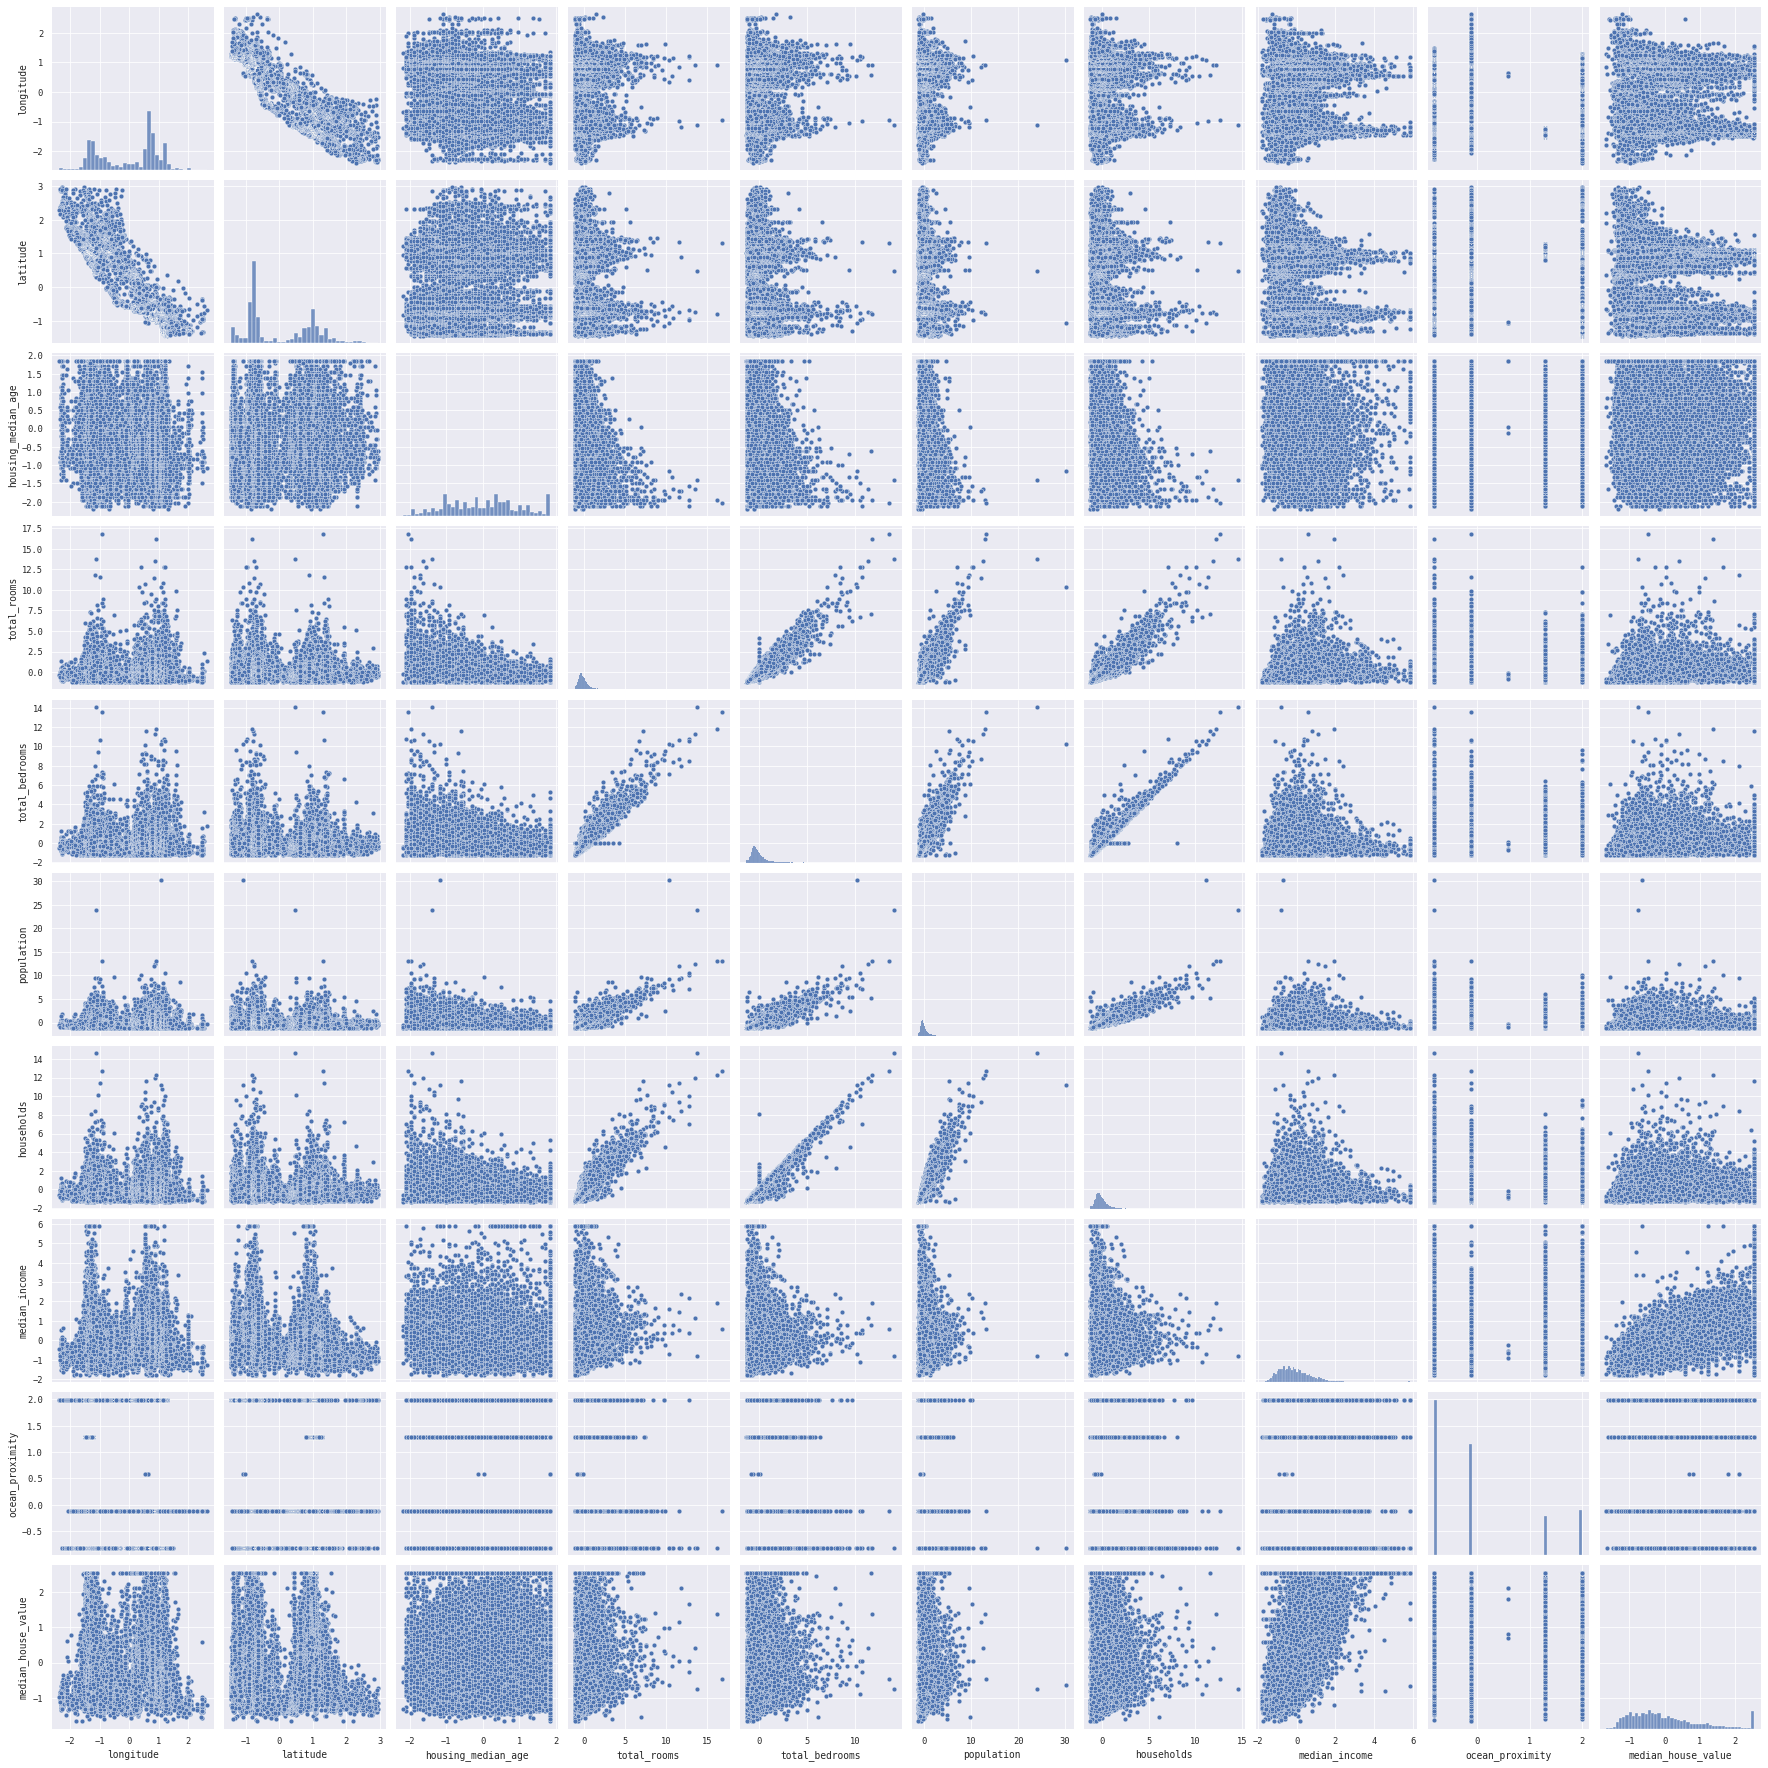

In [145]:
sns.pairplot(scaled_housing_dt,markers=["o"])

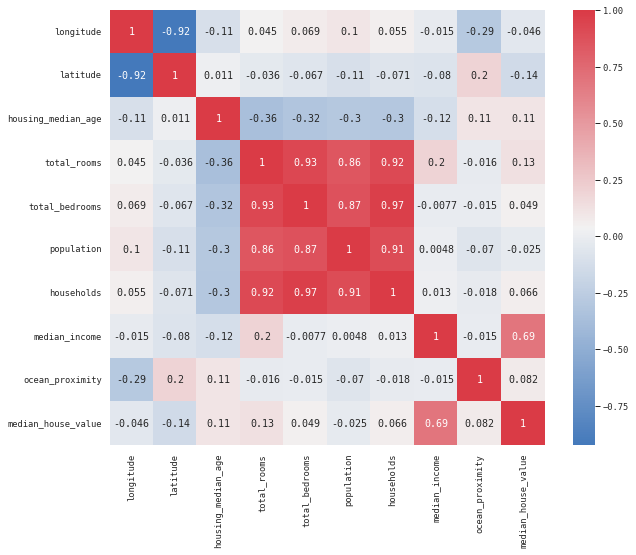

In [146]:
# Heatmap using seaborn
housing_corr_matrix = scaled_housing_dt.corr()
fig, axe = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(250,10, center = "light", as_cmap=True)
sns.heatmap(housing_corr_matrix,square =True, cmap=cmap, annot=True )

Shades and Density of Red Color shows the stronger relation between columns.

From the Above Diagram/Plots, These are be our observations:


1.   Linearity can be observed among very less columns, Not all can be considered for our analysis.
2.   Latitude vs Longitude -  Analysing a relationship, and hence Doesn't make much sense since data provided for these two columns are just Co-ordinates
3.   Total_bedrooms vs Total Rooms - Analysing a relationship between these columns also doesn't make much sense
4.   Households vs Total Bedrooms, Total rooms, Population - Also has linearity between them, but this may not not be useful for our problem statement.
5.   Last but not least, there is a linearity observed with the Median income and Median House Value - which has a strong relationship with income and house price and should be considered for our problem statement. Also as per the heatmap, Only column very much relatable to the output column is median_income)



According to Dataset and Problem Statement, we have to find out the Median House Value so this column is considered as Dependent Column/Target Column and also can be classified as Output column. Rest of the columns can be classified as Independent Data.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


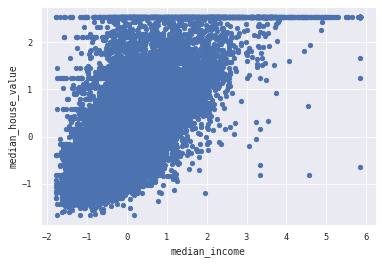

In [148]:
scaled_housing_dt.plot.scatter(x = 'median_income', y = 'median_house_value')

##### 6. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.
Using train_test_split to split the dataset into train and test methods.



In [149]:
X = scaled_housing_dt.drop('median_house_value',axis=1)
Y = scaled_housing_dt["median_house_value"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=2503)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16512, 9), (16512,), (4128, 9), (4128,))

##### 7. Perform Linear Regression : 

[ HINT: Import mean_squared_error from sklearn.metrics ]

a. Perform Linear Regression on training data.

In [150]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

b. Predict output for test dataset using the fitted model.

In [151]:
import math
y_pred = lr.predict(x_test)

c. Print root mean squared error (RMSE) from Linear Regression.

In [152]:
print("Model Score", lr.score(x_train, y_train))
print("RMSE:", math.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:", r2_score(y_test,y_pred))

Model Score 0.635296662157909
RMSE: 0.5998770880694679
R2 Score: 0.6366841281048751


In [153]:
lm = smf.ols(formula='median_house_value ~ longitude+latitude+housing_median_age+total_rooms+total_bedrooms+population+households+median_income+ocean_proximity', data=scaled_housing_dt).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3999.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:00:16   Log-Likelihood:                -18868.
No. Observations:               20640   AIC:                         3.776e+04
Df Residuals:                   20630   BIC:                         3.783e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.469e-17      0.004  -8.26e-15      1.000      -0.008       0.008
longitude             -0.7393      0.013    -57.263      0.000      -0.765      -0.714
latitude              -0.7858      0.013    -61.664      0.000      -0.811      -0.761
housing_median_age     0.1248      0.005     26.447      0.000       0.116       0.134
total_rooms           -0.1265      0.015     -8.609      0.000      -0.155      -0.098
total_bedrooms         0.2995      0.022     13.630      0.000       0.256       0.343
population            -0.3907      0.011    -36.927      0.000      -0.411      -0.370
households             0.2589      0.022     11.515      0.000       0.215       0.303
median_income          0.6549      0.005    119.287      0.000       0.644       0.666
ocean_proximity        0.0009      0.005      0.190      0.850      -0.008       0.010
==============================================================================
Omnibus:                     5037.491   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18953.000
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       7.054   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 7. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).

In [154]:
x_train_in = x_train[["median_income"]]
x_test_in = x_test[["median_income"]]
x_train_in.shape, x_test_in.shape

((16512, 1), (4128, 1))

Perform Linear Regression to predict housing values based on median_income.


In [155]:
lr1 = LinearRegression()
lr1.fit(x_train_in, y_train)

LinearRegression()

Predict output for test dataset using the fitted model.


In [156]:
y_pred_in = lr1.predict(x_test_in)

Print root mean squared error (RMSE) from Linear Regression.


In [157]:
print("Model Score", lr1.score(x_train_in, y_train))
print("RMSE:", math.sqrt(mean_squared_error(y_test,y_pred_in)))
print("R2 Score:", r2_score(y_test,y_pred_in))

Model Score 0.4723426637102913
RMSE: 0.7191095397723252
R2 Score: 0.4779045336215766


In [158]:
lm = smf.ols(formula='median_house_value ~ median_income', data=scaled_housing_dt).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:00:28   Log-Likelihood:                -22668.
No. Observations:               20640   AIC:                         4.534e+04
Df Residuals:                   20638   BIC:                         4.536e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.735e-16      0.005   3.43e-14      1.000      -0.010       0.010
median_income     0.6881      0.005    136.223      0.000       0.678       0.698
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


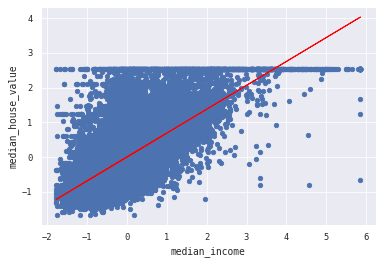

In [159]:
scaled_housing_dt.plot(kind='scatter', x='median_income', y='median_house_value')
plt.plot(x_test_in, y_pred_in, c="red", linewidth=1)